In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(42)
X = torch.randn(100, 2)
y = (X[:, 0] + X[:, 1] > 0).float().view(-1, 1)

class LogisticRegressionSigmoid(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionSigmoid, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))

class LogisticRegressionTanh(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionTanh, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
        self.tanh = nn.Tanh()

    def forward(self, x):
        return self.tanh(self.linear(x))



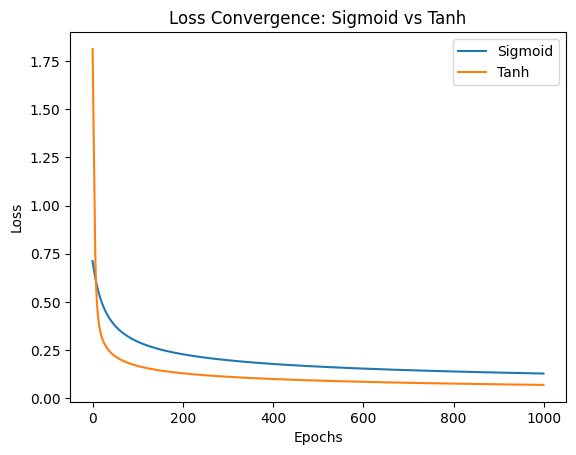

In [3]:
model_sigmoid = LogisticRegressionSigmoid(2)
criterion = nn.BCELoss()
optimizer = optim.SGD(model_sigmoid.parameters(), lr=0.1)

losses_sigmoid = []
epochs = 1000

for epoch in range(epochs):
    outputs = model_sigmoid(X)
    loss = criterion(outputs, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses_sigmoid.append(loss.item())

model_tanh = LogisticRegressionTanh(2)
criterion = nn.MSELoss()
optimizer = optim.SGD(model_tanh.parameters(), lr=0.1)

y_scaled = 2 * y - 1
losses_tanh = []

for epoch in range(epochs):
    outputs = model_tanh(X)
    loss = criterion(outputs, y_scaled)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses_tanh.append(loss.item())

plt.plot(losses_sigmoid, label="Sigmoid")
plt.plot(losses_tanh, label="Tanh")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Convergence: Sigmoid vs Tanh")
plt.legend()
plt.show()